In [1]:
import pandas as pd
import numpy as np
import torch
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore')

In [19]:
data=pd.read_csv('/content/drive/MyDrive/비타민 프로젝트/data.csv')

In [21]:
data['text']=data['text'].astype(str)

In [22]:
data

,text,label
0,ㅂ 사전동 젖병 세척솔사실상이걸 쓰려고 쓰는 포스트이기도 한 출산 전 모두가 몽글이...,0
1,ㅇ 사수유 시트 분유수유할 때 쓰는 걸로 유명한 수유 시트죠 모양이 고정된 만원대에...,0
2,ㅁ사아기 비데아기 비 데는 사실 ㅊㅋ나 ㅍㅍㅂㅂ가젤 유명하죠 저는 당시에라이브 방송...,0
3,ㅎ사홈캠이건 추천이기도 하고 불편한 점 홈캠 자체는 정말 추천 조리원 퇴소하고 나서...,0
4,바구니 배 금액성인 불아동 불불 VND만세까지 아동만 세이하 무료 저는 남자친구와 ...,0
...,...,...
20942,제품 협찬ter razenkorea 피부보습부터 장벽 강화까지 한 번에 아쿠아리차지...,1
20943,제품 협찬 편안하면서 고급스러운 라브데뜨브이넥부 소매트임랩 리본롱 원피스에요 가슴 ...,1
20944,제품 협찬 심플하면서도 이지한 린넨 슬랙스에 요 편안하고 시원한 린넨 소재로 멋스럽...,1
20945,협찬LEPSBOMB은 자연유래 성분만을 고집하는 입욕 코스메틱 브랜드입니다당신이 가...,1


In [4]:
!pip install kss



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
#한국어 문장분리 파이썬 라이브러리 kss
import kss
for i in range (0,20947):
  data['text'][i] = kss.split_sentences(data['text'][i])

In [25]:
data['text'][0  ]

['ㅂ 사전동 젖병 세척솔사실상이걸 쓰려고 쓰는 포스트이기도 한 출산 전 모두가 몽글이 핫딜을 기다릴 때 여러 번 헹굼',
 '세척 안 하고 한 번에 윙하면 세척된다고 하는 광고를 보고 혹해서 샀으나 현실은 설거지 싱크대에 거품 튀고 세척솔이 젖병에 붙어서 같이 건조된 거 보고 충격 먹어서 그 담부터 방치 중인 내전동 세척솔그리고 처음 조리원 퇴소하고 나서 산후도우미를 주 이용했는데 이때 산후도우미분들 중에서 이거 쓰라고 설명까지 해드렸는데 아무도 쓰지 않더라구요 ㅠ',
 '산후도우미가 대부 분 어머니 뻘어르신들이 라 일반 우리가 아는 흔한 젖병 세척솔 안 놔뒀더니 일반 설거지 수세미로 젖병 닦길래 ㅋㅍ로켓배송으로 바로 젖병 세척솔샀구요',
 '도우미 끝나고 저도 설거지하면서 일반 몽글이 세척솔 쓰고 있는데 잘 닦이고 편리하고 금방 금방 설거지하게 되더라구요',
 '그래서 전동세척솔사시는 건 비추몽 글이 세척솔 추천글이 되었는데 육아선배들은 실리콘 세척솔이 좋다 하더라구요',
 '근데 저는 거품 잘 나는 스펀지 세척솔도 괜찮았어요']

In [12]:

!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 30.25 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 39.1 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-01-26 11:31:10--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00:

In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
mecab = Mecab() 

In [27]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게', '만']


In [29]:
data['tokenized'] =data['text'].astype(str).apply(mecab.morphs)
data['tokenized'] =data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [30]:
data

,text,label,tokenized
0,[ㅂ 사전동 젖병 세척솔사실상이걸 쓰려고 쓰는 포스트이기도 한 출산 전 모두가 몽글...,0,"[[, ', ㅂ, 사, 전동, 젖병, 세척, 솔, 사실, 상, 이걸, 쓰, 려고, ..."
1,"[ㅇ 사수유 시트 분유수유할 때 쓰는 걸로 유명한 수유 시트죠, 모양이 고정된 만원...",0,"[[, ', ㅇ, 사, 수유, 시트, 분유, 수유, 할, 때, 쓰, 걸로, 유명, ..."
2,"[ㅁ사아기 비데아기 비 데는 사실 ㅊㅋ나 ㅍㅍㅂㅂ가젤 유명하죠, 저는 당시에라이브 ...",0,"[[, ', ㅁ, 사, 아기, 비데, 아기, 비, 데, 사실, ㅊㅋ나, ㅍㅍㅂㅂ가젤..."
3,[ㅎ사홈캠이건 추천이기도 하고 불편한 점 홈캠 자체는 정말 추천 조리원 퇴소하고 나...,0,"[[, ', ㅎ, 사홈, 캠, 건, 추천, 기, 불편, 점, 홈, 캠, 자체, 정말..."
4,[바구니 배 금액성인 불아동 불불 VND만세까지 아동만 세이하 무료 저는 남자친구와...,0,"[[, ', 바구니, 배, 금액, 성, 불, 아동, 불불, VND, 만세, 까지, ..."
...,...,...,...
20942,[제품 협찬ter razenkorea 피부보습부터 장벽 강화까지 한 번에 아쿠아리차...,1,"[[, ', 제품, 협찬, ter, razenkorea, 피부, 보습, 부터, 장벽..."
20943,[제품 협찬 편안하면서 고급스러운 라브데뜨브이넥부 소매트임랩 리본롱 원피스에요 가슴...,1,"[[, ', 제품, 협찬, 편안, 면서, 고급, 스러운, 라브, 데, 뜨, 브이넥,..."
20944,[제품 협찬 심플하면서도 이지한 린넨 슬랙스에 요 편안하고 시원한 린넨 소재로 멋스...,1,"[[, ', 제품, 협찬, 심플, 면서, 이지한, 린, 넨, 슬랙스, 요, 편안, ..."
20945,"[협찬LEPSBOMB은 자연유래 성분만을 고집하는 입욕 코스메틱 브랜드입니다, 당신...",1,"[[, ', 협찬, LEPSBOMB, 자연, 유래, 성분, 고집, 입욕, 코, 스메..."


In [31]:
# 데이터들의 행과 열 합치기
noad_words = np.hstack(data[data.label == 0]['tokenized'].values)
ad_words = np.hstack(data[data.label == 1]['tokenized'].values)
     

In [33]:
noad_word_count = Counter(noad_words)
print(noad_word_count.most_common(20))

[("'", 38201), ("',", 27844), ('먹', 11309), ('있', 11189), ('[', 10359), ("']", 10359), ('어', 7275), ('좋', 7230), ('맛집', 6490), ('맛', 6427), ('주', 6132), ('었', 6023), ('어요', 5953), ('로', 5717), ('는데', 5322), ('으로', 5018), ('면', 4751), ('기', 4733), ('요', 4701), ('아', 4563)]


In [34]:

ad_word_count = Counter(ad_words)
print(ad_word_count.most_common(20))

[("'", 43396), ("',", 32808), ('있', 18853), ('어', 10971), ('[', 10588), ("']", 10588), ('어요', 10462), ('로', 9473), ('좋', 9280), ('수', 9231), ('주', 9173), ('먹', 8575), ('었', 8535), ('으로', 8485), ('요', 8347), ('해', 7663), ('기', 7505), ('되', 6476), ('는데', 6266), ('제품', 6122)]


In [35]:

#matplotlib 한국어 지원을 위한 패키지 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
     

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 4 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (9,113 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 129513 files and dir

In [36]:
plt.rc('font', family='NanumBarunGothic') 
ny=[int(i[1]) for i in noad_word_count.most_common(10)]
nx=[i[0] for i in noad_word_count.most_common(10)]
ay=[int(i[1]) for i in ad_word_count.most_common(10)]
ax=[i[0] for i in ad_word_count.most_common(10)]

Text(0.5, 1.0, '광고가 아닌 데이터셋의 최빈 단어')

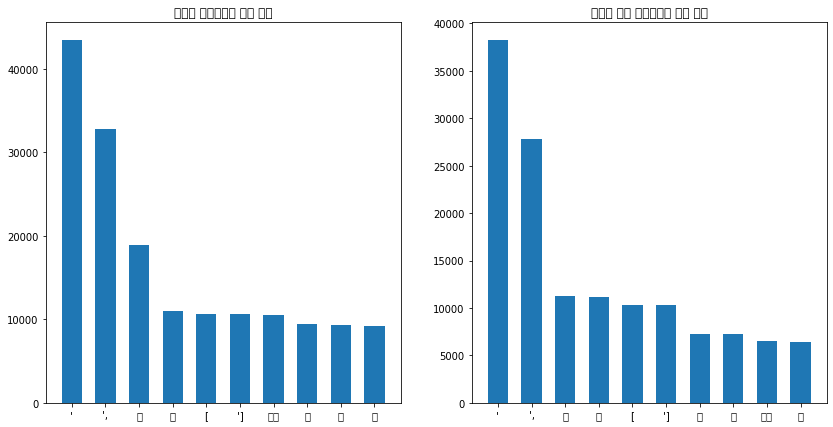

In [39]:

figure, axis = plt.subplots(1, 2,figsize=(14,7))
index = np.arange(len(ay))
axis[0].bar(ax,ay,width=0.6, align='center')
axis[0].set_title("광고인 데이터셋의 최빈 단어")
axis[1].bar(nx,ny,width=0.6, align='center')
axis[1].set_title("광고가 아닌 데이터셋의 최빈 단어")

광고성 글의 평균 길이 : 116.18530411786928
광고가 아닌 글의 평균 길이 : 92.7192779225794


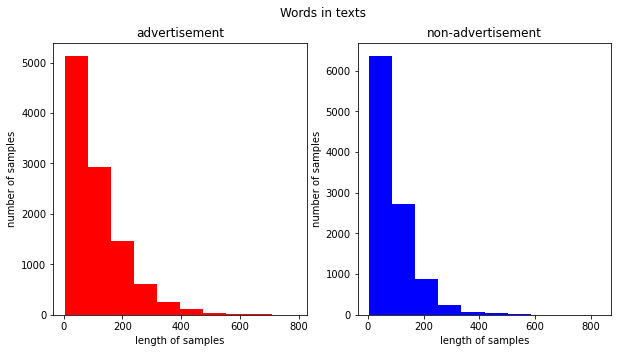

In [41]:

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = data[data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('advertisement')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('광고성 글의 평균 길이 :', np.mean(text_len))

text_len = data[data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('non-advertisement')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('광고가 아닌 글의 평균 길이 :', np.mean(text_len))
plt.show()

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data['tokenized'].values,data['label'].values,test_size=0.3,random_state=3,stratify=data['label'].values)
X_valid, X_test, y_valid, y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=3,stratify=y_test)

In [64]:

len(X_valid),len(X_test)
     

(3142, 3143)

In [65]:

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [66]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합(vocabulary)의 크기 : 47258
등장 빈도가 1번 이하인 희귀 단어의 수: 20611
단어 집합에서 희귀 단어의 비율: 43.61377967751492
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.344032030883197
단어 집합의 크기 : 26649


In [67]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_valid = tokenizer.texts_to_sequences(X_valid)
     

In [68]:
print(X_valid[:3])

[[5, 2, 230, 3828, 230, 22, 207, 1139, 3, 2, 230, 7, 113, 1467, 2403, 39, 54, 4, 3, 2, 621, 433, 13, 31, 3, 2, 755, 6150, 7, 233, 103, 137, 366, 174, 11, 222, 8, 7, 17, 151, 10, 339, 160, 7, 17, 151, 2393, 83, 837, 1139, 3, 2, 1, 230, 364, 5782, 122, 86, 7, 61, 339, 9242, 424, 2056, 230, 2805, 11, 6], [5, 2, 11786, 773, 7189, 9447, 1, 8984, 7189, 2508, 165, 1, 111, 3, 2, 1, 3026, 1493, 283, 317, 11, 1, 13441, 11786, 1, 202, 8305, 5785, 51, 70, 101, 62, 60, 66, 6], [5, 2, 29, 108, 10705, 132, 299, 3013, 1501, 5958, 3794, 256, 14, 337, 17, 3199, 198, 159, 58, 985, 608, 63, 50, 7, 8475, 1, 3, 2, 256, 1270, 8, 116, 46, 38, 2669, 12, 78, 7871, 1259, 21, 11, 23, 305, 3171, 12, 312, 25, 8, 4, 8, 773, 17, 303, 11412, 132, 299, 3013, 1501, 5958, 3794, 4340, 1159, 1048, 2218, 7959, 217, 36, 21, 477, 48, 1987, 795, 39, 16, 4, 241, 3, 2, 4393, 609, 71, 21, 1836, 39, 16, 4, 29, 117, 19740, 132, 299, 3013, 5958, 3794, 439, 3794, 190, 439, 3794, 21, 921, 386, 190, 145, 1004, 450, 865, 228, 1, 7997, 1

리뷰의 최대 길이 : 788
리뷰의 평균 길이 : 104.59146091938344


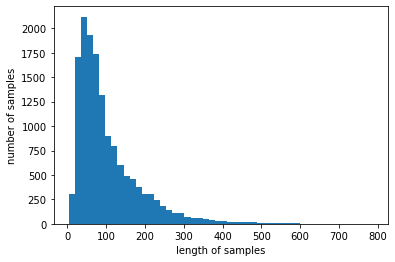

In [69]:

print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [70]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [71]:

max_len = 400
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 400 이하인 샘플의 비율: 98.75187559678079


In [72]:

X_train = pad_sequences(X_train, maxlen = max_len)
X_test = pad_sequences(X_test, maxlen = max_len)
X_valid = pad_sequences(X_valid , maxlen = max_len)
     

In [73]:

import re
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [74]:

model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(1, activation='sigmoid'))
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, callbacks=[mc], batch_size=256, validation_data=(X_valid, y_valid))

Epoch 1/10
58/58 [==============================] - ETA: 0s - loss: 0.5053 - acc: 0.7607
Epoch 1: val_acc improved from -inf to 0.83514, saving model to best_model.h5
58/58 [==============================] - 204s 3s/step - loss: 0.5053 - acc: 0.7607 - val_loss: 0.3793 - val_acc: 0.8351
Epoch 2/10
58/58 [==============================] - ETA: 0s - loss: 0.3066 - acc: 0.8836
Epoch 2: val_acc improved from 0.83514 to 0.87969, saving model to best_model.h5
58/58 [==============================] - 198s 3s/step - loss: 0.3066 - acc: 0.8836 - val_loss: 0.2938 - val_acc: 0.8797
Epoch 3/10
58/58 [==============================] - ETA: 0s - loss: 0.2145 - acc: 0.9265
Epoch 3: val_acc improved from 0.87969 to 0.88160, saving model to best_model.h5
58/58 [==============================] - 200s 3s/step - loss: 0.2145 - acc: 0.9265 - val_loss: 0.2881 - val_acc: 0.8816
Epoch 4/10
58/58 [==============================] - ETA: 0s - loss: 0.1468 - acc: 0.9515
Epoch 4: val_acc improved from 0.88160 to 0.

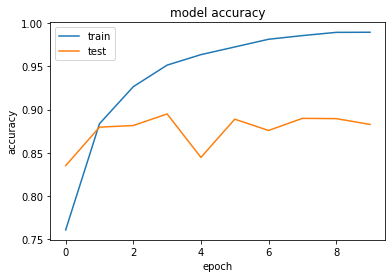

In [75]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
     

In [76]:


loaded_model = load_model('best_model.h5')
print("테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

99/99 [==============================] - 16s 153ms/step - loss: 0.2909 - acc: 0.9007
테스트 정확도: 0.9007


In [77]:
from sklearn.metrics import classification_report
th=0.26
y_pred = (loaded_model.predict(X_test)[:,0] >= th).astype(int)
print(classification_report(y_test, y_pred))
     

99/99 [==============================] - 17s 160ms/step
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      1554
           1       0.86      0.94      0.90      1589

    accuracy                           0.89      3143
   macro avg       0.90      0.89      0.89      3143
weighted avg       0.90      0.89      0.89      3143



In [78]:
from sklearn.metrics import classification_report
th=0.1
y_pred = (loaded_model.predict(X_test)[:,0] >= th).astype(int)
print(classification_report(y_test, y_pred))

99/99 [==============================] - 15s 153ms/step
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      1554
           1       0.81      0.97      0.88      1589

    accuracy                           0.87      3143
   macro avg       0.88      0.87      0.87      3143
weighted avg       0.88      0.87      0.87      3143



In [79]:

from sklearn.metrics import classification_report
for th in np.arange(0.2,0.30,0.01):
  print("threshold: %.2f"%th)
  y_pred = (loaded_model.predict(X_test)[:,0] >= th).astype(int)
  print(classification_report(y_test, y_pred))

threshold: 0.20
99/99 [==============================] - 16s 164ms/step
              precision    recall  f1-score   support

           0       0.94      0.82      0.87      1554
           1       0.84      0.95      0.89      1589

    accuracy                           0.88      3143
   macro avg       0.89      0.88      0.88      3143
weighted avg       0.89      0.88      0.88      3143

threshold: 0.21
99/99 [==============================] - 15s 151ms/step
              precision    recall  f1-score   support

           0       0.93      0.82      0.88      1554
           1       0.85      0.94      0.89      1589

    accuracy                           0.88      3143
   macro avg       0.89      0.88      0.88      3143
weighted avg       0.89      0.88      0.88      3143

threshold: 0.22
99/99 [==============================] - 15s 148ms/step
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1554
           1       0.